In [1]:
import pandas as pd 
import numpy as np
import re 
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib as plt
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.pyplot import figure

# 1- Data wrangling

# 1.1 Gathering

- df1 which represents `twitter_archive_enhanced.csv`

In [2]:
df1 = pd.read_csv("twitter-archive-enhanced.csv")

- df2 which represents `image_predictions.tsv`

In [3]:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)
df2 = pd.read_csv('image_predictions.tsv', sep='\t')

- df3 which represents `tweet_json.txt`

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [4]:
df3 = pd.read_json('tweet_json.txt', lines=True)

# 1.2 Assessing 

### df1

### Visually 

In [5]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
df1.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [7]:
df1.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
964,750506206503038976,NaN,NaN,2016-07-06 01:46:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Malcolm. He's absolutely terrified of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750506206...,8,10,Malcolm,None,None,pupper,None
1726,680055455951884288,NaN,NaN,2015-12-24 16:00:30 +0000,"<a href=""https://about.twitter.com/products/tw...","Meet Sammy. At first I was like ""that's a snow...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/680055455...,10,10,Sammy,None,None,None,None
386,826615380357632002,NaN,NaN,2017-02-01 02:17:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Please only send in dogs. We on...,8.099208e+17,4.196984e+09,2016-12-17 00:38:52 +0000,https://twitter.com/dog_rates/status/809920764...,10,10,None,None,None,None,None
1833,676146341966438401,NaN,NaN,2015-12-13 21:07:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bert. He likes flowers. 10/10 https://...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676146341...,10,10,Bert,None,None,None,None
513,811647686436880384,8.116272e+17,4.196984e+09,2016-12-21 19:01:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",PUPDATE: I've been informed that Augie was act...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2280,667393430834667520,NaN,NaN,2015-11-19 17:26:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fwed. He is a Canadian Asian Taylormad...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667393430...,8,10,Fwed,None,None,None,None
2136,670055038660800512,NaN,NaN,2015-11-27 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tommy. He's a cool dog. Hard not to st...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670055038...,3,10,Tommy,None,None,None,None
1804,676946864479084545,NaN,NaN,2015-12-16 02:08:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pups goal was to get all four feet as clo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676946864...,12,10,None,None,None,None,None
1073,739932936087216128,NaN,NaN,2016-06-06 21:32:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Rorie. She's zen af. Just enjoyin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739932936...,10,10,Rorie,None,None,None,None
1260,710269109699739648,NaN,NaN,2016-03-17 00:58:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The squad is back for St. Patrick's Day! ☘ 💚\n...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710269109...,13,10,None,None,None,None,None


#### Summary of visual assessment 

- Nan in [in_reply_to_status_id - in_reply_to_user_id - retweeted_status_id - retweeted_status_user_id -retweeted_status_timestamp] Which can't be estimated. 
- ‘timestamp’ column has +0000 in it.
- ‘source’ column is not clear 

### programmaticaly 

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
df1['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [11]:
df1['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

#### Summary of programmatic assessment 

- 'tweet_id' is an int not a string
- 'timestamp' is a float not a datetime 
- removing rows that have non-empty values in [in_reply_to_status_id - in_reply_to_user_id - retweeted_status_id - retweeted_status_user_id -retweeted_status_timestamp]
- One variable in Four columns ['doggo', 'floofer', 'pupper', puppo] and each variable should forms a column.
- we have some no sense values in both columns rating  numerator and denominator, so it's better to control them to get some useful visualization

### df2

### Visually 

In [12]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [13]:
df2.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [14]:
df2.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
472,675145476954566656,https://pbs.twimg.com/media/CV6ZOPqWsAA20Uj.jpg,1,Labrador_retriever,0.458746,True,Great_Dane,0.235504,True,Staffordshire_bullterrier,0.116864,True
1022,710272297844797440,https://pbs.twimg.com/media/Cdtk414WoAIUG0v.jpg,1,Old_English_sheepdog,0.586307,True,wire-haired_fox_terrier,0.118622,True,Lakeland_terrier,0.106806,True
560,677716515794329600,https://pbs.twimg.com/media/CWe7kw9W4AE8UJh.jpg,1,teddy,0.662908,False,crib,0.031891,False,chow,0.025438,True
692,684222868335505415,https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg,1,soft-coated_wheaten_terrier,0.791182,True,cocker_spaniel,0.072444,True,teddy,0.071486,False
1408,770293558247038976,https://pbs.twimg.com/media/CrCh5RgW8AAXW4U.jpg,1,Italian_greyhound,0.931668,True,Mexican_hairless,0.038896,True,whippet,0.013151,True
754,688211956440801280,https://pbs.twimg.com/ext_tw_video_thumb/68821...,1,bannister,0.369449,False,four-poster,0.105307,False,shoji,0.098767,False
1615,802247111496568832,https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg,1,Chihuahua,0.721188,True,toy_terrier,0.112943,True,kelpie,0.053365,True
1086,718631497683582976,https://pbs.twimg.com/media/CfkXiX6W4AAmICF.jpg,1,Pomeranian,0.993718,True,Pekinese,0.003611,True,Persian_cat,0.000525,False
1814,833722901757046785,https://pbs.twimg.com/media/C5H6jmgW8AAevqq.jpg,1,West_Highland_white_terrier,0.918144,True,Maltese_dog,0.025721,True,Lakeland_terrier,0.020211,True
1229,745433870967832576,https://pbs.twimg.com/media/ClhQJUUWAAEVpBX.jpg,1,barrow,0.999962,False,basset,0.000014,True,wok,0.000006,False


#### Summary of visual assessment 

- We have Three predection rates we can get the first one that will refere to True.
- We have Three breed predections we can get the one who meets with the first predection rate that refers to True.
- Some problems with the breed predections column some names are capitalized and the other are in the lower case.

### programmaticaly 

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### Summary of programmatic assessment 

- 'tweet_id' is an int not a string

### df3

### Visually 

In [17]:
df3.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [18]:
df3.tail()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2353,2015-11-15 22:32:08+00:00,666020888022790149,666020888022790144,Here we have a Japanese Irish Setter. Lost eye...,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2535,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [19]:
df3.sample(10)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
1662,2016-01-01 05:00:24+00:00,682788441537560576,682788441537560576,Happy New Year from your fav holiday squad! 🎉 ...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 682788433895489537, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2706,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
638,2016-11-01 01:00:05+00:00,793256262322548741,793256262322548736,Oh h*ck look at this spookling right here. Fri...,False,"[0, 98]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 793256253871034369, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,22350,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
574,2016-11-22 17:28:25+00:00,801115127852503040,801115127852503040,This is Bones. He's being haunted by another d...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 801115094935449600, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,8992,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
896,2016-07-29 02:40:28+00:00,758854675097526272,758854675097526272,This is Lilli Bee &amp; Honey Bear. Unfortunat...,False,"[0, 110]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 758854659951865861, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,3904,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1092,2016-05-29 01:49:16+00:00,736736130620620800,736736130620620800,This is Chadrick. He's gnarly af 13/10 https:/...,False,"[0, 38]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 736736122429014017, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,4736,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1607,2016-01-08 19:45:39+00:00,685547936038666240,685547936038666240,Everybody needs to read this. Jack is our firs...,False,"[0, 98]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 685547930707750912, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,35052,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1530,2016-01-21 02:56:40+00:00,690005060500217858,690005060500217856,"""I'm the only one that ever does anything in t...",False,"[0, 90]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 690005054112284675, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,4004,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
681,2016-10-19 01:29:35+00:00,788552643979468800,788552643979468800,RT @dog_rates: Say hello to mad pupper. You kn...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,0.0,0.0,en,{'created_at': 'Sat May 28 03:04:00 +0000 2016...,NaN,NaN,NaN
970,2016-07-04 22:00:12+00:00,750086836815486976,750086836815486976,This is Spanky. He was a member of the 2002 US...,False,"[0, 105]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 749842022312337408, 'id_str'...","<a href=""https://about.twitter.com/products/tw...",NaN,...,2383,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
440,2017-01-13 01:03:12+00:00,819711362133872643,819711362133872640,This is Howie. He just bloomed. 11/10 revoluti...,False,"[0, 54]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 819711336993198081, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,14916,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


#### Summary of visual assessment 

-  get just the needed columns 
- 'id' column should be 'tweet_id' to match other dataframes 

### programmaticaly 

In [20]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [21]:
df3.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


#### Summary of programmatic assessment 

- 'id' is an int not a string

# To SUM IT UP 

### df1

- -removing rows that have non-empty values in [in_reply_to_status_id - in_reply_to_user_id - retweeted_status_id - retweeted_status_user_id -retweeted_status_timestamp] `Quality`
- Nan in [in_reply_to_status_id - in_reply_to_user_id - retweeted_status_id - retweeted_status_user_id -retweeted_status_timestamp] Which can't be estimated. `Quality`
- ‘timestamp’ column has +0000 in it. `Quality`
- ‘source’ column is not clear. `Quality`
- 'tweet_id' is an int not a string. `Quality`
- 'timestamp' is a float not a datetime. `Quality`
- One variable in Four columns ['doggo', 'floofer', 'pupper', puppo] and each variable should form a column. `Tidiness`
- extract the rating numerator from the text . `Quality` 
-  Now we need to change the rating numerator data type into float. `Quality`


### df2

- We have Three predction rates we can get the first one that will refer to True. Each variable forms a column. `Tidiness`
- We have Three breed predictions we can get the one who meets with the first prediction rate that refers to True.each variable forms a column. `Tidiness`
- Some problems with the breed predictions column some names are capitalized and the other are in the lower case.`Quality` 

### df3

-  get just the needed columns. `Quality`

- finally we need to merge the Three data frames. `Tidiness`

# 1.3 Cleaning 

In [22]:
df1_clean = df1.copy()
df2_clean = df2.copy()
df3_claen = df3.copy()

### df1_clean

#### Define 

- removing rows that have non-empty values in [in_reply_to_status_id - in_reply_to_user_id - retweeted_status_id - retweeted_status_user_id -retweeted_status_timestamp]

#### Code

In [23]:
df1_clean = df1_clean[df1_clean['in_reply_to_status_id'].isnull()]
df1_clean = df1_clean[df1_clean['retweeted_status_id'].isnull()]

#### Test

In [24]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

#### Define  

-- Nan in [in_reply_to_status_id - in_reply_to_user_id - retweeted_status_id - retweeted_status_user_id -retweeted_status_timestamp] Which can't be estimated.

#### Code 

In [25]:
df1_clean=df1_clean.drop(['in_reply_to_status_id',
                          'in_reply_to_user_id',
                          'retweeted_status_id',
                          'retweeted_status_user_id',
                          'retweeted_status_timestamp'],axis = 1)

#### Test 

In [26]:
df1_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

#### Define

- ‘timestamp’ column has +0000 in it.

#### Code 

In [27]:
df1_clean['timestamp']=df1_clean['timestamp'].str[:-5]

#### Test 

In [28]:
df1_clean['timestamp']

0       2017-08-01 16:23:56 
1       2017-08-01 00:17:27 
2       2017-07-31 00:18:03 
3       2017-07-30 15:58:51 
4       2017-07-29 16:00:24 
                ...         
2351    2015-11-16 00:24:50 
2352    2015-11-16 00:04:52 
2353    2015-11-15 23:21:54 
2354    2015-11-15 23:05:30 
2355    2015-11-15 22:32:08 
Name: timestamp, Length: 2097, dtype: object

#### Define 

- ‘source’ column is not clear

#### Code 

In [29]:
df1_clean['source']=df1_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

#### Test

In [30]:
df1_clean['source'].value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

#### Define

- 'tweet_id' is an int not a string

#### Code 

In [31]:
df1_clean['tweet_id'] = df1_clean['tweet_id'].astype(str)

#### Test 

In [32]:
df1_clean.dtypes

tweet_id              object
timestamp             object
source                object
text                  object
expanded_urls         object
rating_numerator       int64
rating_denominator     int64
name                  object
doggo                 object
floofer               object
pupper                object
puppo                 object
dtype: object

#### Define 

- 'timestamp' is a float not a datetime 

#### Code

In [33]:
df1_clean['timestamp'] =pd.to_datetime(df1_clean['timestamp'])

#### Test 

In [34]:
df1_clean.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
dtype: object

#### Define 

- One variable in Four columns ['doggo', 'floofer', 'pupper', puppo] and each variable should forms a column.

#### Code 

In [35]:
df1_clean_cols = df1_clean[['doggo','floofer','pupper','puppo']]

In [36]:
for col in df1_clean_cols.columns:
    df1_clean[col] = df1_clean[col].replace('None','')

In [37]:
df1_clean['dog_stage'] = df1_clean['doggo'] + df1_clean['floofer'] + df1_clean['pupper'] + df1_clean['puppo']

In [38]:
df1_clean['dog_stage'].value_counts()

                1761
pupper           221
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [39]:
df1_clean['dog_stage'] = df1_clean['dog_stage'].replace('',np.nan)
df1_clean = df1_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)

#### Test

In [40]:
df1_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


In [41]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   object        
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   expanded_urls       2094 non-null   object        
 5   rating_numerator    2097 non-null   int64         
 6   rating_denominator  2097 non-null   int64         
 7   name                2097 non-null   object        
 8   dog_stage           336 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 163.8+ KB


#### Define 

- extract the rating numerator from the text . `Quality` 

#### Code

In [42]:
ratings = df1_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
df1_clean.rating_numerator = ratings[0]

#### Test 

In [43]:
df1_clean.rating_numerator

0       13
1       13
2       12
3       13
4       12
        ..
2351     5
2352     6
2353     9
2354     7
2355     8
Name: rating_numerator, Length: 2097, dtype: object

#### Define

- Now we need to change the rating numerator data type into float. `Quality`

#### Code

In [44]:
df1_clean.rating_numerator = df1_clean.rating_numerator.astype(float)

#### Test 

In [45]:
df1_clean.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator             float64
rating_denominator             int64
name                          object
dog_stage                     object
dtype: object

### df2_clean

#### Defien 

- We have Three predection rates we can get the first one that will refere to True.
- We have Three breed predections we can get the one who meets with the first predection rate that refers to True.

#### Code

In [46]:
breed_prediction = []
predection_confidence = []
def prediction_confidence(df):
    if df['p1_dog'] == True:
        breed_prediction.append(df['p1'])
        predection_confidence.append(df['p1_conf'])
    elif df['p2_dog'] == True:
        breed_prediction.append(df['p2'])
        predection_confidence.append(df['p2_conf'])
    elif df['p3_dog'] == True:
        breed_prediction.append(df['p3'])
        predection_confidence.append(df['p3_conf'])
    else:
        breed_prediction.append('NaN')
        predection_confidence.append(0)

df2_clean.apply(prediction_confidence, axis=1)
df2_clean['breed_prediction'] = breed_prediction
df2_clean['predection_confidence'] = predection_confidence

In [47]:
df2_clean=df2_clean.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis = 1)

#### Test 

In [48]:
df2_clean.head()

,tweet_id,jpg_url,img_num,breed_prediction,predection_confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


#### Define

- Some problems with the breed predections column some names are capitalized and the other are in the lower case.

#### Code 

In [49]:
df2_clean['breed_prediction'] = df2_clean['breed_prediction'].str.replace('_', " ")

In [50]:
df2_clean['breed_prediction'] = df2_clean['breed_prediction'].str.title()

#### Test 

In [51]:
df2_clean['breed_prediction']

0       Welsh Springer Spaniel
1                      Redbone
2              German Shepherd
3          Rhodesian Ridgeback
4           Miniature Pinscher
                 ...          
2070                    Basset
2071        Labrador Retriever
2072                 Chihuahua
2073                 Chihuahua
2074                       Nan
Name: breed_prediction, Length: 2075, dtype: object

In [52]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2075 non-null   int64  
 1   jpg_url                2075 non-null   object 
 2   img_num                2075 non-null   int64  
 3   breed_prediction       2075 non-null   object 
 4   predection_confidence  2075 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 81.2+ KB


#### Define 

- 'tweet_id' is an int not a string

#### Code 

In [53]:
df2_clean['tweet_id'] = df2_clean['tweet_id'].astype(str)

#### Test

In [54]:
df2_clean.dtypes

tweet_id                  object
jpg_url                   object
img_num                    int64
breed_prediction          object
predection_confidence    float64
dtype: object

### df3_clean

### Define 

-  get just the needed columns.

### Code 

In [55]:
df3_claen = df3_claen[['id','retweet_count','favorite_count']]

### Test 

In [56]:
df3_claen.columns

Index(['id', 'retweet_count', 'favorite_count'], dtype='object')

In [57]:
df3_claen

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


#### Define

- 'id' is an int not a string. 

#### Code

In [58]:
df3_claen['id'] = df3_claen['id'].astype(str)

#### Test 

In [59]:
df3_claen.dtypes

id                object
retweet_count      int64
favorite_count     int64
dtype: object

#### Define 


- Merge the Three data frames

#### Code 

In [60]:
dfs = pd.merge(df1_clean, df2_clean, how = 'inner', on = 'tweet_id')

In [61]:
df123 =pd.merge(dfs, df3_claen, how = 'left', left_on='tweet_id', right_on='id')

In [62]:
df123 = df123.drop(['id'],axis=1)

#### Test

In [63]:
df123.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,breed_prediction,predection_confidence,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Nan,0.000000,8853,39467
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,6514,33819
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,4328,25461
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador Retriever,0.168086,8964,42908
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,9774,41048


# 2- Storing, analyzing, and visualizing the wrangled data

# 2.1 Storing

In [64]:
df123.to_csv('twitter_archive_master.csv',encoding='utf-8', index=False)

# 2.2 Analyzing and Visualizing

In [65]:
df_master = df123

In [66]:
df123.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               1971 non-null   object        
 1   timestamp              1971 non-null   datetime64[ns]
 2   source                 1971 non-null   object        
 3   text                   1971 non-null   object        
 4   expanded_urls          1971 non-null   object        
 5   rating_numerator       1971 non-null   float64       
 6   rating_denominator     1971 non-null   int64         
 7   name                   1971 non-null   object        
 8   dog_stage              303 non-null    object        
 9   jpg_url                1971 non-null   object        
 10  img_num                1971 non-null   int64         
 11  breed_prediction       1971 non-null   object        
 12  predection_confidence  1971 non-null   float64       
 13  ret

In [67]:
df_master['dog_stage'].value_counts()

pupper          201
doggo            63
puppo            22
doggopupper       8
floofer           7
doggopuppo        1
doggofloofer      1
Name: dog_stage, dtype: int64

### Insights  (1)
- 'Puppoer dog stage is the most common stage'

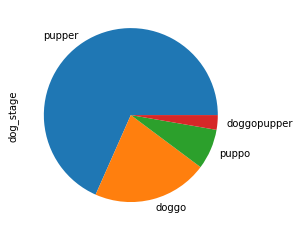

In [68]:
df_dog_stage_rate = df_master[df_master.dog_stage.notnull()]
df_dog_stage_rate['dog_stage'].value_counts()[:4].plot(kind='pie');
plt.savefig('Dog stages.png')

### Insights  (1)
- 'Pupper dog stage is the most common stage'

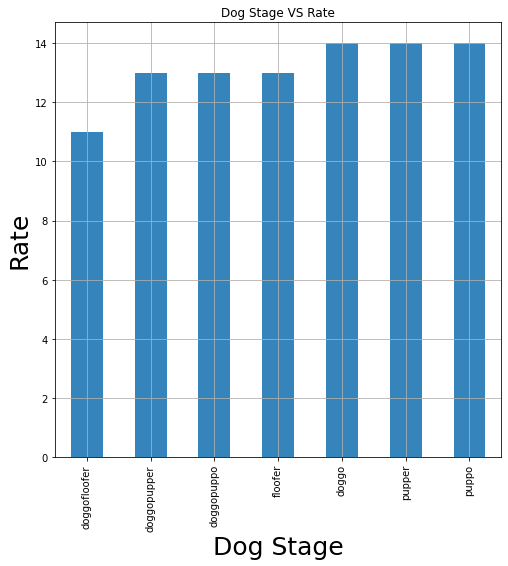

In [69]:
plt.rcParams["figure.figsize"] = (8,8)
rates = df_dog_stage_rate.groupby('dog_stage')['rating_numerator'].max().sort_values()
rates.plot(kind = 'bar' , title ="Dog Stage VS Rate" , alpha=0.9);
plt.xlabel('Dog Stage',fontsize = 25)
plt.ylabel('Rate',fontsize = 25);
plt.grid()
plt.savefig('Dog Stage VS Rate.png')

### Insights  (2)
- 'Puppo, Puppoer and doggo dog stages are the most rated stages'

In [70]:
df_master['breed_prediction'].value_counts()[1:16]

Golden Retriever            156
Labrador Retriever          106
Pembroke                     94
Chihuahua                    90
Pug                          62
Toy Poodle                   50
Chow                         48
Samoyed                      42
Pomeranian                   41
Malamute                     33
French Bulldog               31
Chesapeake Bay Retriever     31
Cocker Spaniel               30
Miniature Pinscher           24
Eskimo Dog                   22
Name: breed_prediction, dtype: int64

### Insights  (3)
- 'Golden Retriever, Lbrador Retriever and Pembroke breeds are the most common breeds'

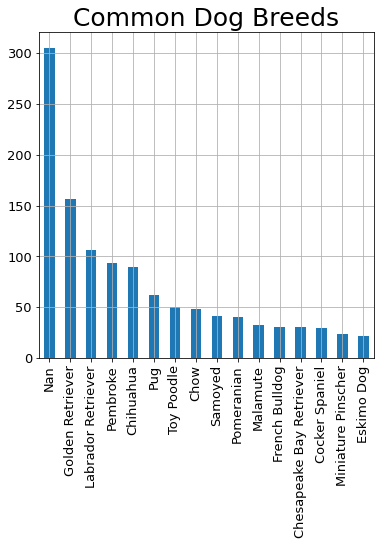

In [71]:
plt.figure(figsize=(6,6))
plt.title("Common Dog Breeds", size=25)
df_master['breed_prediction'].value_counts()[0:16].plot(kind='bar',fontsize=13);
plt.grid()
plt.savefig('Common Dog Breedss.png')

### Insights  (3)
- 'Golden Retriever breed is the most common breed'

In [72]:
df_master['breed_prediction'] = df_master['breed_prediction'].replace(['Nan'], np.nan)
df_breed_rate = df_master[df_master.breed_prediction.notnull()]

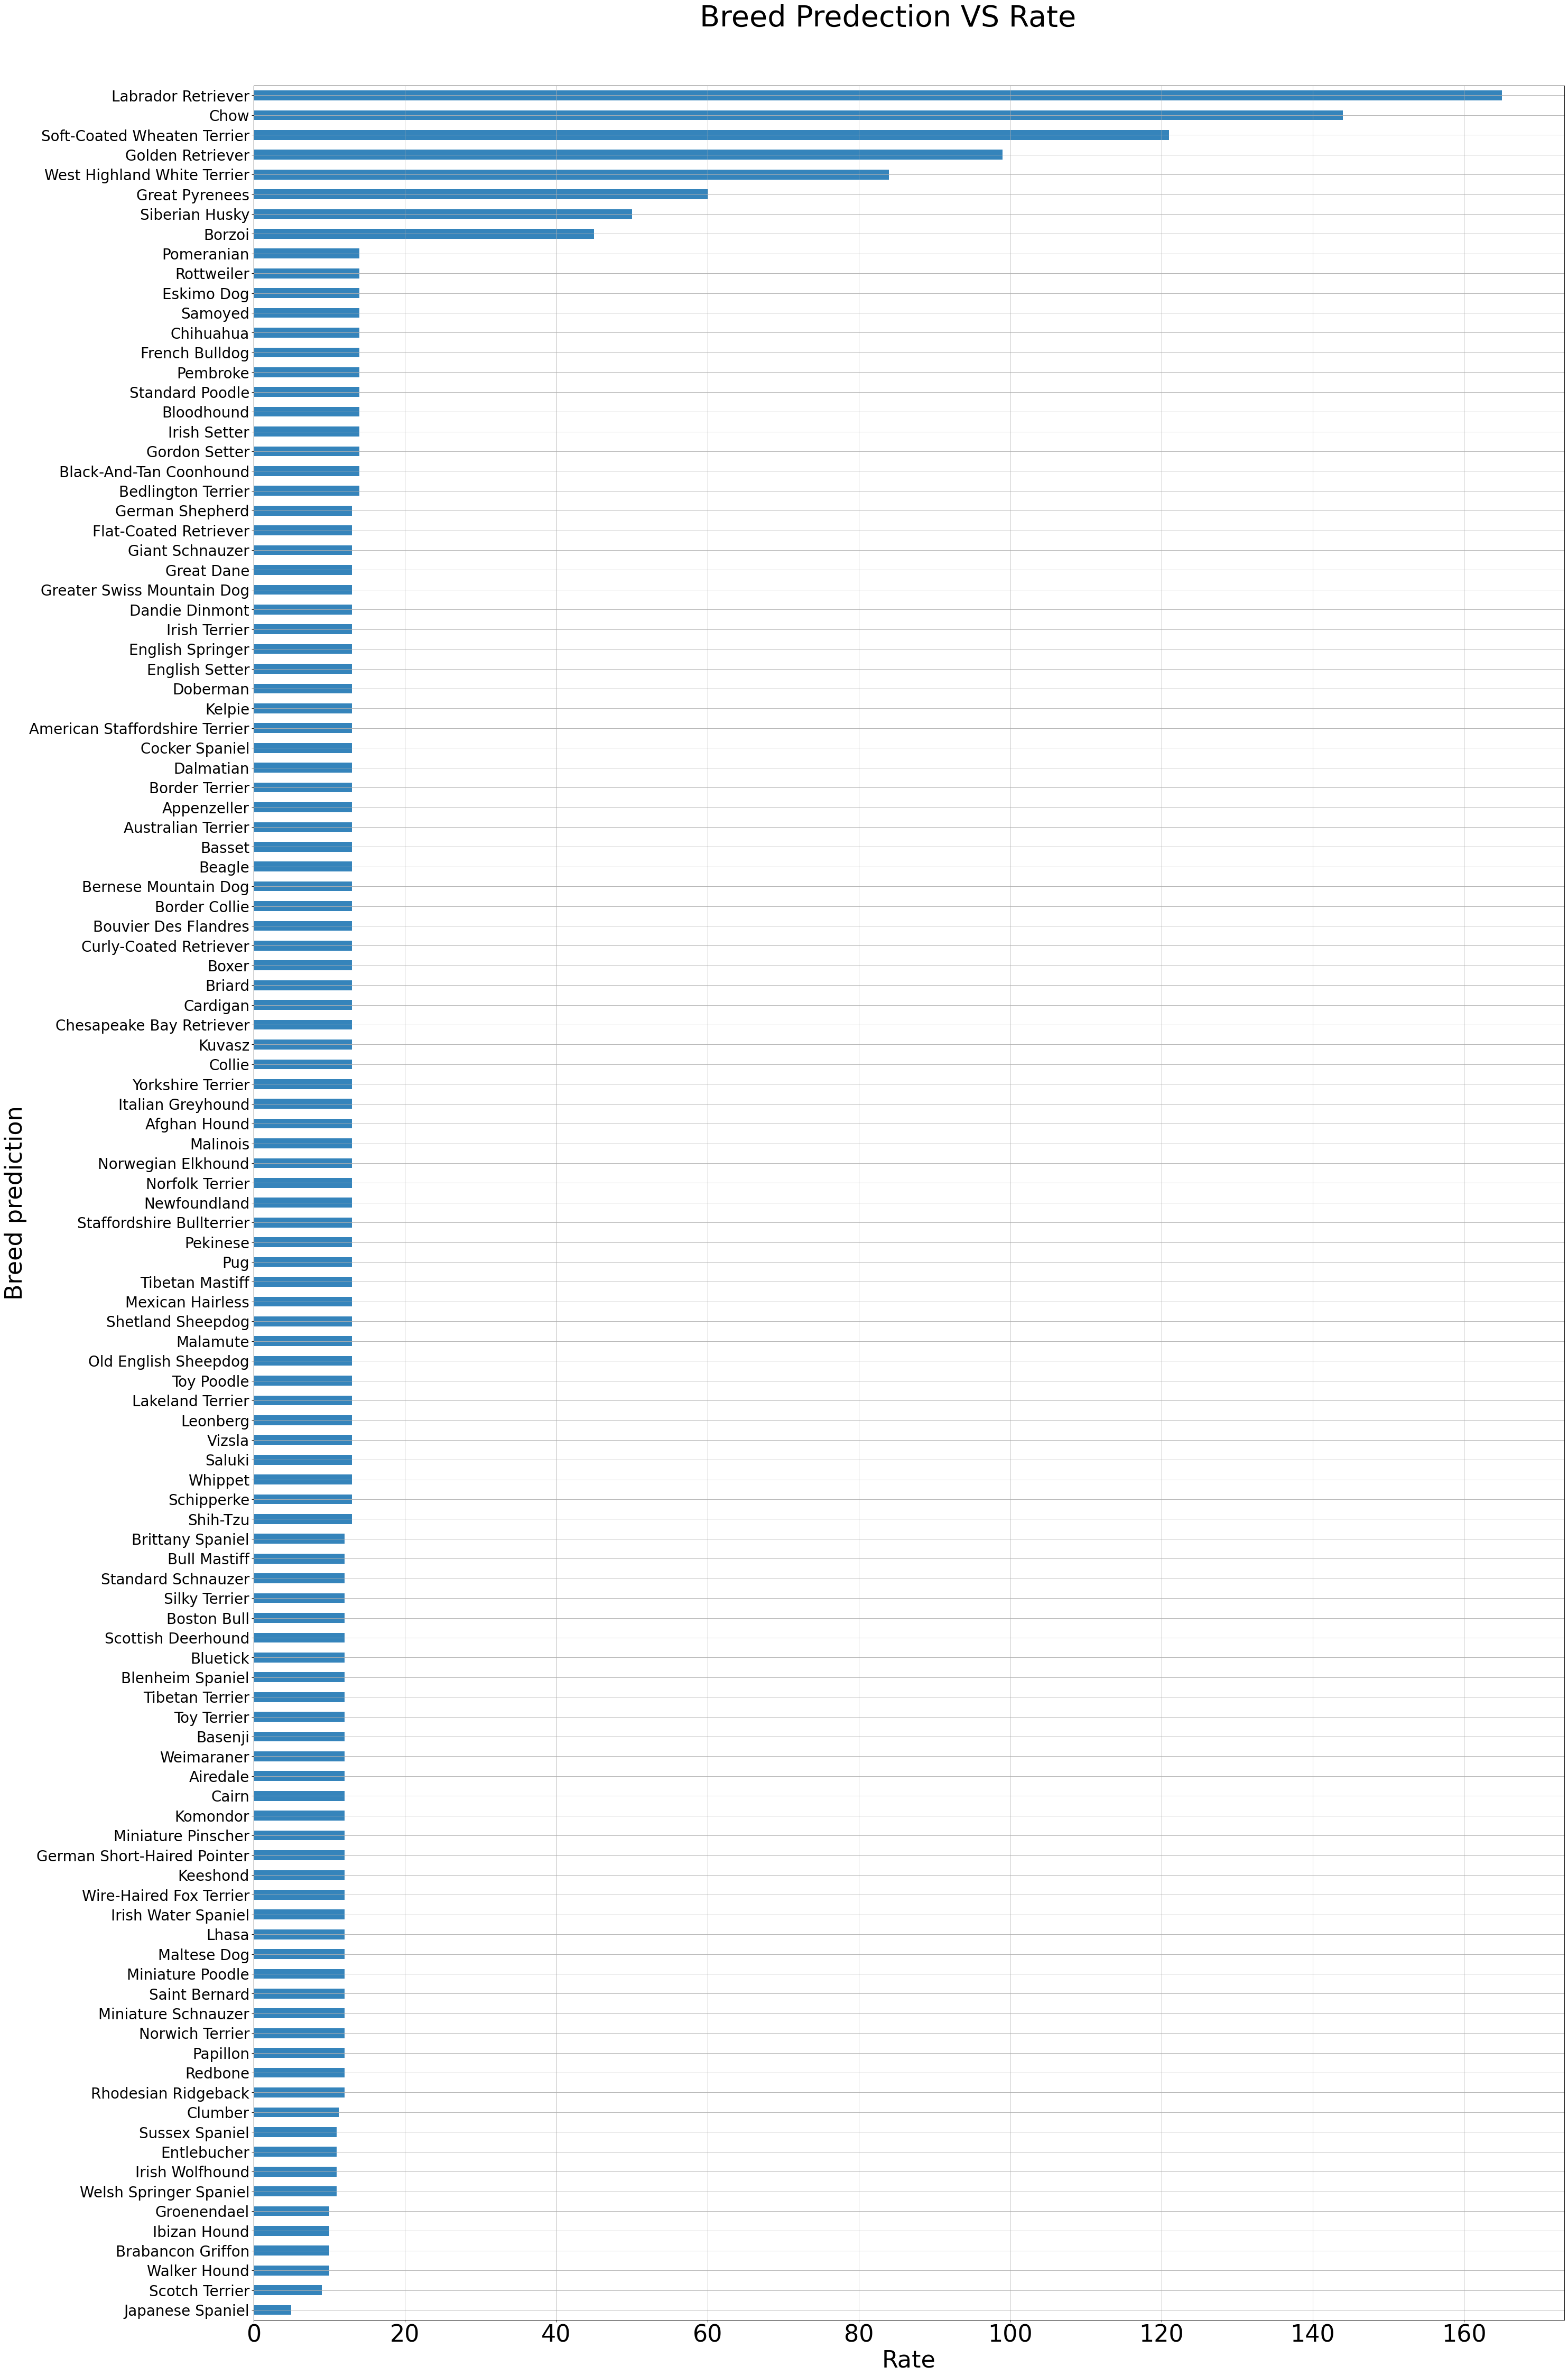

In [73]:
figure(num=None, figsize=(40, 70), dpi=80, facecolor='w', edgecolor='k')
rates = df_breed_rate.groupby('breed_prediction')['rating_numerator'].max().sort_values()
rates.plot(kind = 'barh' ,alpha=0.9);
plt.xlabel('Rate',fontsize = 40)
plt.ylabel('Breed prediction',fontsize = 40);
plt.yticks(fontsize=25, rotation=0)
plt.xticks(fontsize=40, rotation=0)
plt.figtext(.5,.9,'Breed Predection VS Rate', fontsize=50, ha='center')
plt.grid()
plt.savefig('Breed Predection VS Rate.png')

### Insights  (4)
- 'Lbrador Retriever is the most rated breed'

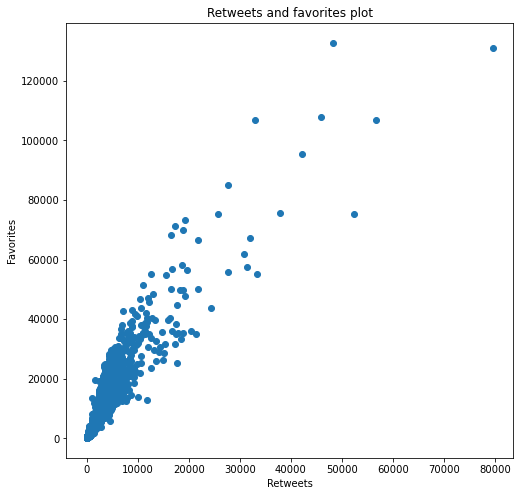

<Figure size 640x480 with 0 Axes>

In [74]:
plt.scatter(df_master['retweet_count'], df_master['favorite_count'])
plt.xlabel('Retweets')
plt.ylabel('Favorites')
plt.title('Retweets and favorites plot');
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k');
plt.savefig('Retweets and favorites plot_.png')

### Insights  (5)
- Retweet count is directly proportional with favorite count